<a href="https://colab.research.google.com/github/PelumiOgunlusi/PelumiOgunlusi/blob/main/Part_I_Data_exploration_Ogunlusi_Pelumi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I - (Ford GoBike System Data Exploration)
## by (OGUNLUSI PELUMI)

## Introduction
> The Dataset includes information about individual rides made in a bike-sharing system covering the greater San-francisco Bay Area. The data consists of information regarding trips taken by members of the bike sharing service.

## Preliminary Wrangling


In [ ]:
# importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the dataset into a pandas dataframe
df = pd.read_csv(r"C:\Users\pelumi Ogunlusi\Desktop\201902-fordgobike-tripdata (1).csv")

In [ ]:
# visual assessment the dataset for tidiness and cleaniness issues
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [ ]:
# programatic assessment of data tidiness
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [ ]:
# convering the duration in seconds to minutes
df['minutes'] = df['duration_sec']/60

In [ ]:
# Chaning the data type of the start time and endtime columns to datetime format
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [ ]:
# subtracting the end time from start time to get time taken for each trip
df['difference'] = df.end_time - df.start_time

In [ ]:
# converting the time difference to hours 
df['hours'] = df['difference'].dt.total_seconds()/3600

In [ ]:
# extracting essential columns year,month,day,weekday,and time for further analysis
df['year'] = pd.DatetimeIndex(df['start_time']).year
df['month'] = pd.DatetimeIndex(df['start_time']).month
df['day'] = pd.DatetimeIndex(df['start_time']).day
df['time_of_day'] = df['start_time'].dt.time
df['weekday'] = df['start_time'].dt.dayofweek

In [ ]:
# defining a function to tell if a round trip (i.e a trip that starts and stops at the same location) has taken place
def round(x):
    if x['start_station_name'] == x['end_station_name']:
        return 'yes'
    else:
        return 'no'

In [ ]:
# applying the function to the dataframe
df['Round_Trip'] = df.apply(round,axis=1)

In [ ]:
# defining a function to calculate the age of riders based on their birth year
def findAge(x):
    if x['member_birth_year'] < 2022:
        return 2022 - x['member_birth_year']
    else:
        return np.nan

In [ ]:
# applying the function to the dataframe
df['Age_of_rider'] = df.apply(findAge,axis=1)

In [ ]:
# mapping the month numbers to the corresponding month abbreviations
dic = {1:'Jan',2 : 'Feb',3 :'Mar',4:'Apr',5 :'May', 6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
df['month'] = df['month'].map(dic)

In [ ]:
# mapping the weekday numbers to the corresponding day abbreviations
day_order = {0:'Mon',1 : 'Tue',3 :'Wed',4:'Thur',5 :'Fri', 6:'Sat',7:'Sun'}
df['weekday'] = df['weekday'].map(day_order)

In [ ]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'minutes', 'difference', 'hours', 'year', 'month', 'day', 'time_of_day',
       'weekday', 'Round_Trip', 'Age_of_rider'],
      dtype='object')

In [ ]:
# dropping columns that will not be used for this analysis
df.drop(columns = ['duration_sec','start_time','end_time','start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude','difference'], inplace = True)

In [ ]:
# checking to ensure all changes have been made
df.head(2)

,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,minutes,hours,year,month,day,time_of_day,weekday,Round_Trip,Age_of_rider
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,869.750000,14.496064,2019,Feb,28,17:32:10.145000,Wed,no,38.0
1,The Embarcadero at Steuart St,Berry St at 4th St,2535,Customer,NaN,NaN,No,708.683333,11.811463,2019,Feb,28,18:53:21.789000,Wed,no,NaN


In [ ]:
df.shape

(183412, 16)

In [ ]:
# summary statistics of the dataset
df.describe()

,bike_id,member_birth_year,minutes,hours,year,day,Age_of_rider
count,183412.000000,175147.000000,183412.000000,183412.000000,183412.0,183412.000000,175147.000000
mean,4472.906375,1984.806437,12.101307,0.201827,2019.0,15.298977,37.193563
std,1664.383394,10.116689,29.906496,0.498441,0.0,8.028187,10.116689
min,11.000000,1878.000000,1.016667,0.016967,2019.0,1.000000,21.000000
25%,3777.000000,1980.000000,5.416667,0.090397,2019.0,8.000000,30.000000
50%,4958.000000,1987.000000,8.566667,0.142958,2019.0,15.000000,35.000000
75%,5502.000000,1992.000000,13.266667,0.221199,2019.0,22.000000,42.000000
max,6645.000000,2001.000000,1424.066667,23.734675,2019.0,28.000000,144.000000


In [ ]:
# downloading a copy of the cleaned dataset for use in the explanatory data visualization notebook
df.to_csv('Ford Go Bike Data cleaned.csv', index=False)

### What is the structure of your dataset?

> There are 183,412 records of trips taken by users of the FordGoBike system in the dataset. After initial cleaning and wrangling of the dataset, we are left with 16 columns in dataset, most of which are categorical or qualitative variables. The dataset only contains ride trips for the month of February 2019. The numeric variables present in the dataset are: member_birth_year, duration of trip in minutes and hours, and Age of rider. Some columns in this dataset were derived dring the wrangling phase of data exploration. 

### What is/are the main feature(s) of interest in your dataset?

> I am mostly interested in how the length of rides for each trip is affected by a variety of features either singly or in conjuction with other features

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that weekday and user_type will have the strongest effect on durarion of ride: it is my intuition that most subscribers would take longer rides compared to casual users, also rides during the weekend should most likely have a longer duration as compared to weekdays. I also think that the time of day  could also have an effect on how long the ride takes as we would expect night rides to have a shorter duration as compared to day time rides.

## Univariate Exploration

>**Question 1: What are the top 10 most frequent start stations for riders**


In [ ]:
# defining a function to plot top 10 values for any categorical variable in the dataset
def barhplt(df,col):
    x = df[col].value_counts().head(10).index
    y = df[col].value_counts().head(10)
    plt.barh(x,y)
    plt.title('Top 10 '+ str(col));

>**Visualization**

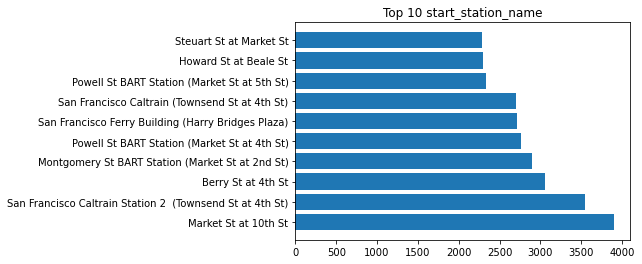

In [ ]:
barhplt(df,'start_station_name')

>**Observations**
<br>The top 10 most frequently used start stations are shown above. There is no significant implication to this in our analysis

>**Question 2: What are the top 10 most frequent end stations for riders**

>**Visualization**

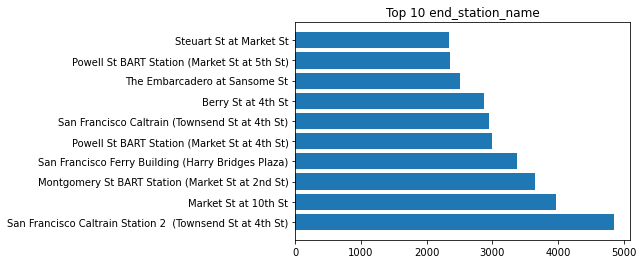

In [ ]:
barhplt(df,'end_station_name')

>**Observations**
<br>We can see from the above visualization that St.Fransisco Caltrain Station 2, and Market St are the top 2 most common starting point and end point of most of the riders indicating these regions  might be densely populated with people looking for easier means of moving around

>**Question 3: What percentage of the users are actual subscribers**

In [ ]:
# defining a function to plot a piechart showing percentage of subscribers
def piechart(df,col):
    x = df[col].value_counts()
    plt.pie(x, labels = x.index, startangle = 90, autopct='%.2f%%', counterclock = False);

>**Visualization**

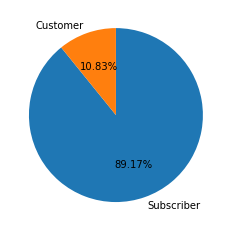

In [ ]:
piechart(df,'user_type')

>**Observations**
<br>More than 89% of the users of the bike sharing service are subscribers showing the company has a good marketing strategy to attract subscribers

>**Question 4: What is the Age distribution of members of the bike sharing app**

>**Visualization**

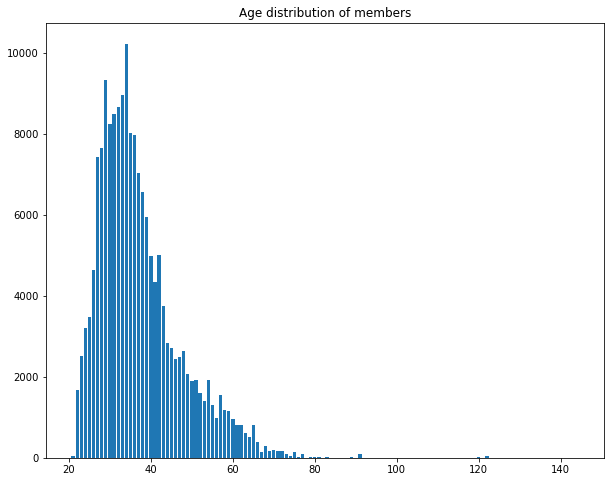

In [ ]:
# plotting a bar chart shwoing the distribution of the Ages of the users
plt.figure(figsize=(10,8))
x=df.Age_of_rider.value_counts().index
y=df.Age_of_rider.value_counts()
plt.title('Age distribution of members')
plt.bar(x,y);

>**Observations**
<br>Most of the users of this service fall between the ages of roughly 25-40 years old. However, some outliers are seen in the data with the maximum age being 144. This is most likely an error during the process of data preparation. 

>**Question 5: What proportion of the members are Male?**

>**Visualization**

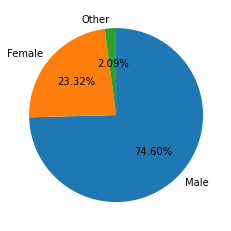

In [ ]:
piechart(df,'member_gender')

>**Observations**
<br>75% of the riders are Male, 23% are females, and 2% have other genders

>**Question 6: How many users use bike_share for all their trips?**

In [ ]:
# defining a function to plot the frequency of categorical variables
def ctplt(df,col,order=None,color=None):
    sns.countplot(data=df, x = col,order=order,color=color);

>**Visualization**

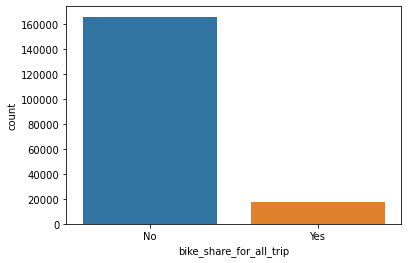

In [ ]:
ctplt(df,'bike_share_for_all_trip')

>**Observations**
<br> Majority of users do not use the bike share app for all their trips

>**Question 7: What is the distribution of rides across different days in a Month?**

>**Visualization**

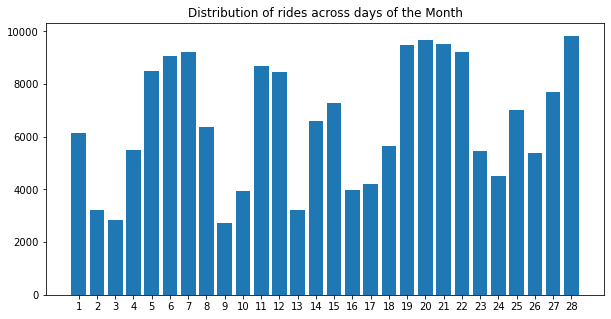

In [ ]:
# plotting a bar chart shwoing the distribution of the Ages of the users
x = df.day.value_counts(sort=False).index
y = df.day.value_counts(sort=False)
plt.figure(figsize=(10,5))
plt.title('Distribution of rides across days of the Month')
tick_props = np.arange(1, 29, 1)
tick_names = [i for i in tick_props]
plt.xticks(tick_props, tick_names)
plt.bar(x,y);

>**Observations**
<br> The distribution of rides by days is bimodal with most rides occuring between Days 5-7, and Days 19-22 of the Month

>**Question 8: What is the distribution of rides across Weekdays?**

>**Visualization**

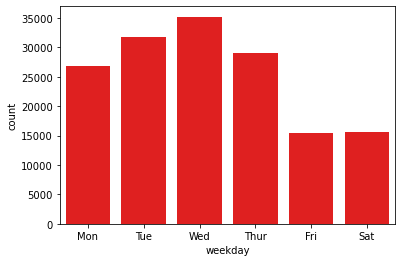

In [ ]:
ctplt(df,'weekday',order=['Mon','Tue','Wed','Thur','Fri','Sat'], color='r')

>**Observations**
<br> Most rides occur during midweek Tuesday to Thursday with no rides on Sunday

>**Question 9: What proportion of the total dataset were Round trips?**

>**Visualization**

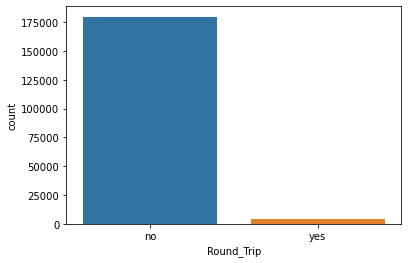

In [ ]:
ctplt(df,'Round_Trip')

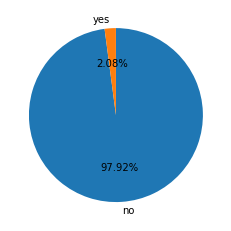

In [ ]:
piechart(df,'Round_Trip')

>**Observations**
<br> About 98% of the trips had a different start and stop station with only 2% being roundtrips

>**Question 10: What is the distribution of the duration of the rides in mintes?**

>**Visualization**

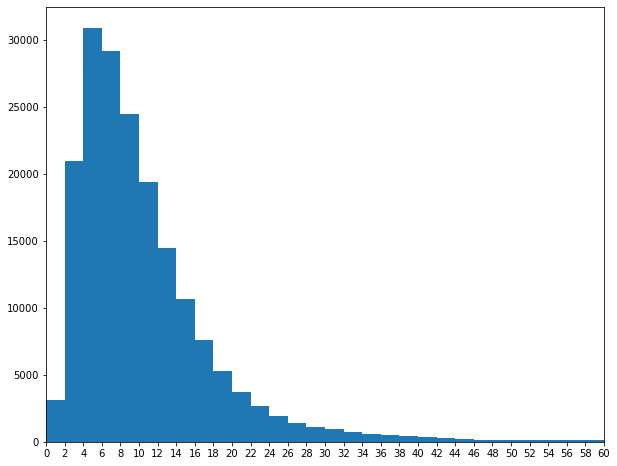

In [ ]:
# plotting the distribution of the minutes column with x axis limited to 60
plt.figure(figsize=(10,8))
bins = np.arange(0, df['minutes'].max()+2, 2)
plt.hist(data = df, x = 'minutes', bins=bins)
plt.xticks(bins)
plt.xlim((0,60));

''

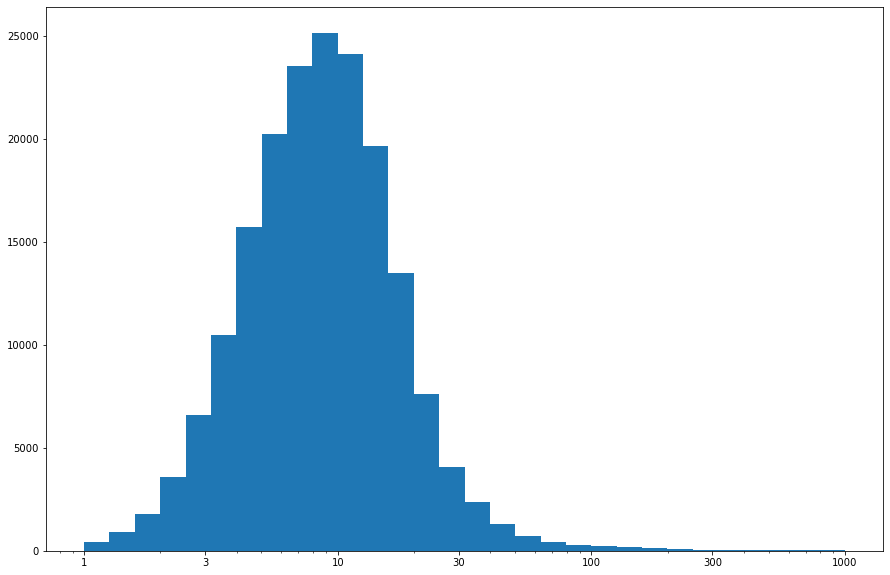

In [ ]:
# plotting the distribution of the minutes column with x axis scaled using log transformation
plt.figure(figsize=(15,10))
bins = 10 ** np.arange(0, 3+0.1, 0.1)
plt.hist(data = df, x = 'minutes', bins=bins)
plt.xscale('log')
;plt.xticks([1,3,10,30,100,300,1000],['1','3','10','30','100','300','1000']);

>**Observations**
<br> The minutes column in the dataset was highly skewed to the right with lots of outliers. I first tried visualizing by limiting the x axis to 60 but this was not suffcient for interpretation. However, scaling the x axis was able to resolve this issue and we can see most rides fall within the 6 minutes to 12 minutes range

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The minutes variable took on a large range of values with extreme outliers. After scaling the data using log transform, the data looked unimodal, with the peak between 6 minutes to 12 minutes

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the dataset, the Age variable was also slightly skewed to the right with a member being 144 years old though this is likely an error due to data collection. A few operations were carried out on the dataset in order to tidy it involving convering the start_time column to datetime fomat to generate year,month,day,time,and weekday columns. Also, other columns such as Age of rider, and Round trip were all derived for further analysis

## Bivariate Exploration

>**Question 11: What is the relationship between Age and Ride duration in hours?**

>**Visualization**

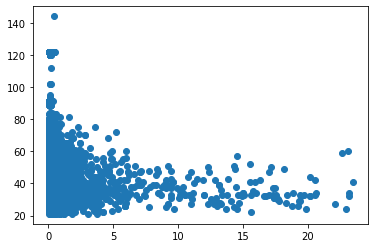

In [ ]:
# plotting a scatter plot to show relationship between Age of riders and hours spent on rides
plt.scatter(data=df, x='hours',y='Age_of_rider');

In [ ]:
bike_sample = df.sample(200)

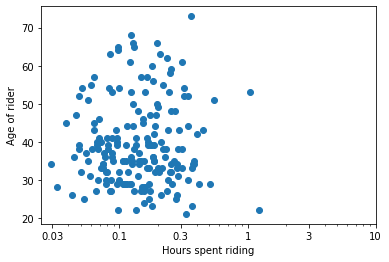

In [ ]:
# plotting a scatter plot to show relationship between Age of riders and hours spent on rides after scaling the x axis
plt.scatter(data = bike_sample, x = 'hours', y = 'Age_of_rider')
plt.xscale('log')
plt.xlabel('Hours spent riding')
plt.ylabel('Age of rider')
plt.xticks([0.03,0.1,0.3,1,3,10],['0.03','0.1','0.3','1','3','10']);

>**Observations**
<br> Due to the enormosity of the points in the data, describing the relationship between these 2 variables will be difficult. Hence, I randomly picked 200 samples from the data for easier plotting. From the plot, we can seee that most riders spend less than 30 minutes during rides and those that actually take longer rides are the young 

>**Question 12: What is the relationship between time of day and Ride duration in minutes?**

>**Visualization**

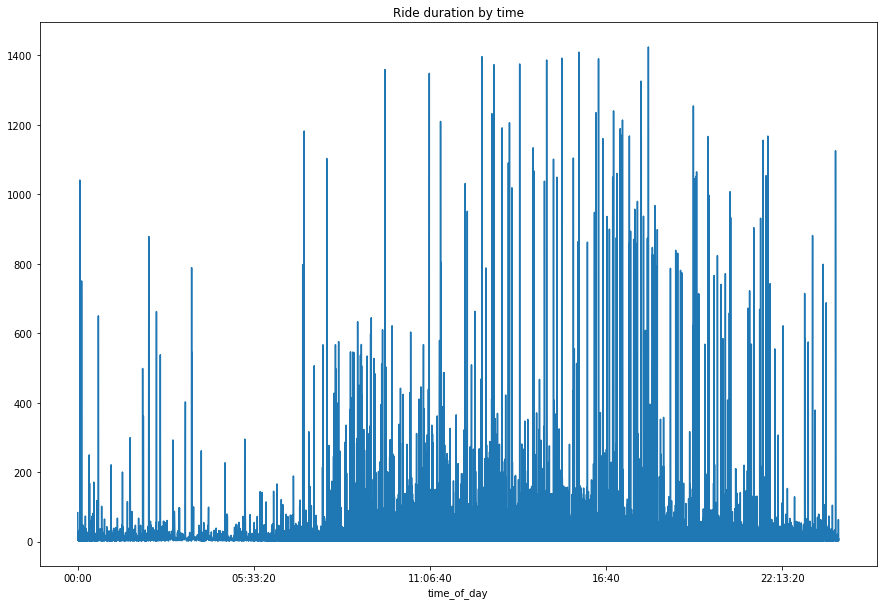

In [ ]:
# making a plot to see ride duration during different times of the day
plt.figure(figsize=(15,10))
plt.title('Ride duration by time')
df.groupby('time_of_day')['minutes'].mean().plot(kind='line');

>**Observations**
<br> From the plot above, we can see the average ride duration peaks during the day roughly between 8am to 5pm

>**Question 13: What is the relationship between Age of riders and subscriber status?**

In [ ]:
# defining a function to plot boxplot of categorical variables against numerical variables in the dataset
def box(df,x,y,order=None):
    sns.boxplot(data=df, x=x, y=y, order=order,showfliers=False);

>**Visualization**

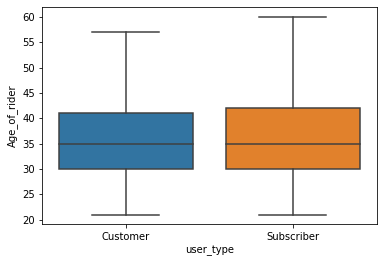

In [ ]:
box(df,'user_type','Age_of_rider')

>**Observations**
<br> From the plot above, it is evident that most customers and subscribers alike fall into the same age group 30-40

>**Question 14: What is the relationship between Round trips and length of length of rides in minutes?**

>**Visualization**

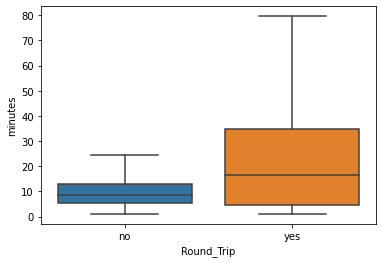

In [ ]:
box(df,'Round_Trip','minutes')

>**Observations**
<br> From the plot above, we can see that round trips take on average require longer trip duratin as expected

>**Question 15: What is the relationship between Gender and length of length of rides in hours?**

>**Visualization**

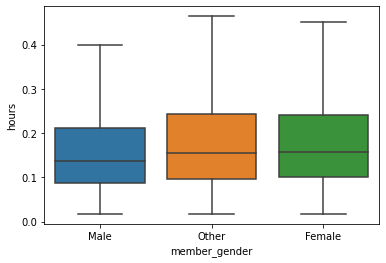

In [ ]:
box(df,'member_gender','hours')

>**Observations**
<br> From the plot above, there is no clear difference between gender in terms of ride length however male users have a slightly ride trip duration compared to female and other genders

>**Question 16: What is the relationship between Age of riders and whether they use the bike services for all their trips?**

>**Visualization**

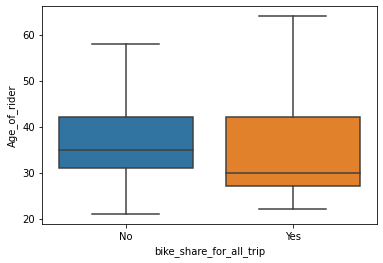

In [ ]:
box(df,'bike_share_for_all_trip','Age_of_rider')

>**Observations**
<br> From the plot above, we can see a wider range of Age class (27-40) use bike sharing for all their trips while those who do not are typically aged 30-40 years

>**Question 17: What weekday has the longest rides in minutes?**

>**Visualization**

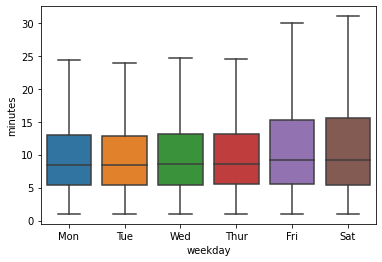

In [ ]:
box(df,'weekday','minutes',order=['Mon','Tue','Wed','Thur','Fri','Sat'])

>**Observations**
<br> From the plot above, we can see that weekends Friday and Saturday have the longest and this was previously expected 

>**Question 18: Do subscribers take longer rides compared to casual users?**

>**Visualization**

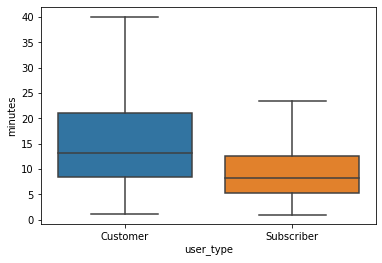

In [ ]:
box(df,'user_type','minutes')

>**Observations**
<br> From the plot above, it is suprising and interesting to see customers actually take longer rides compared to subscribers. This probably might be due to the fact that subscribers most likely have access to the service throughout the year and therefore feel relaxed and use the services for leisure purposes. Customers on the other hand only probably use the service during working hours to and from their offices leading to longer rides. 

>**Question 19: How do customers and subscribers use the services during the week?**

>**Visualization**

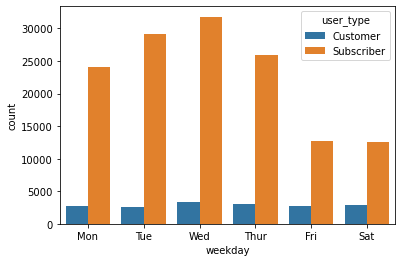

In [ ]:
# plotting a chart showing user_type distribution across the weekdays
sns.countplot(data=df, x='weekday', order=['Mon','Tue','Wed','Thur','Fri','Sat'], hue='user_type');

>**Observations**
<br> From the plot above, we can see that customers maintain a relatively uniform usage rate across the week 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Ride duration had as expected was affected by user_type, week_day, and time of day for the trip. We see the average ride duration of peak during the day roughly between 8am to 5pm. Also, weekends feature the longest ride duration in the dataset as compared to weekddays. Suprisingly though, casual users or customers have a longer ride duration compare to actual subscribers. This can be attributed to them using the service more regularly/daily for getting to their workplace.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, another feature that had great correlation with ride duration is Age of patients with more younger users going for longer rides while the aged prefer shorter rides(<30 minutes).

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

>**Question 20: How does Age of users relate to ride duration in terms of user type?**

In [ ]:
# defining a function to multivariate charts of two numeric variables and one categorical variable
def multivar(bike_sample,var1,var2,var3):
    plt.figure(figsize=(10,6))
    cat_markers = [[var1, 'o'],
               [var2, 's']]
    for cat, marker in cat_markers:
        df_cat = bike_sample[bike_sample[var3] == cat]
        plt.xscale('log')
        plt.xlabel('Hours spent riding')
        plt.ylabel('Age of rider')
        plt.scatter(data = df_cat, x = 'hours', y = 'Age_of_rider', marker = marker)
        plt.xticks([0.03,0.1,0.3,1,3,10],['0.03','0.1','0.3','1','3','10'])
    plt.legend([var1,var2]);

>**Visualization**

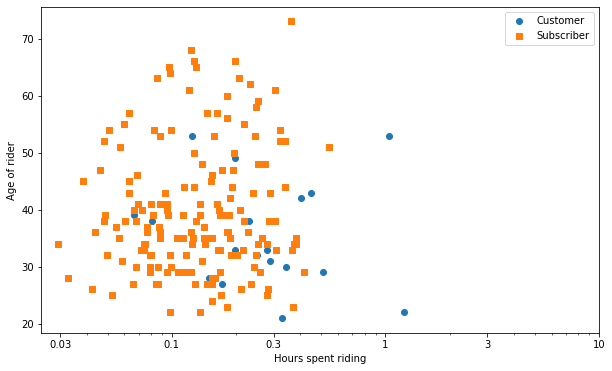

In [ ]:
multivar(bike_sample,'Customer','Subscriber','user_type')

>**Observations**
<br> From the plot above, we can see that most subscribers have age range evenly distributed and time spent less than 30 minutes while customers have fall below Age 60 

>**Question 21: How does Age of users relate to ride duration in terms of Gender?**

>**Visualization**

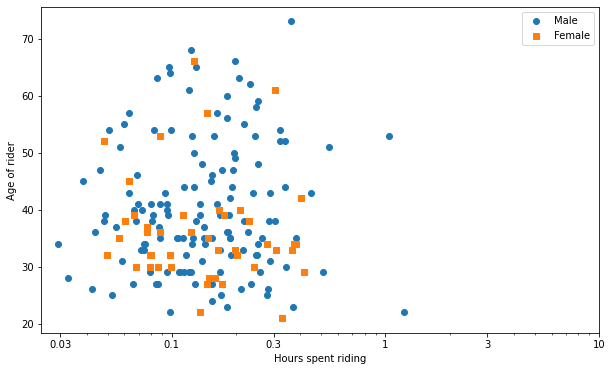

In [ ]:
multivar(bike_sample,'Male','Female','member_gender')

>**Observations**
<br> From the plot above, we can see that both males and females tend to keep an average trip duration of <30 minutes but Male users go up to Age 70 while female have their highest age at slightly below 60

>**Question 22: How does Age of users relate to ride duration in terms of bike usage?**

>**Visualization**

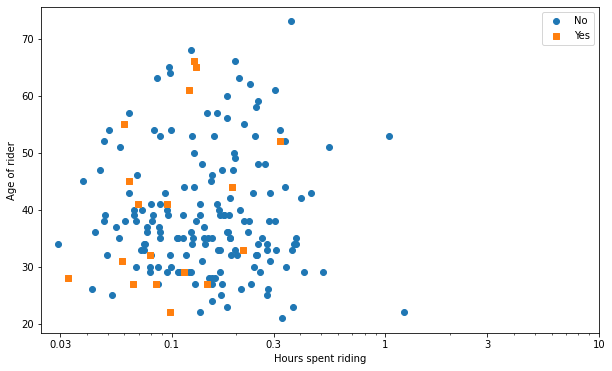

In [ ]:
multivar(bike_sample,'No','Yes','bike_share_for_all_trip')

>**Observations**
<br> From the plot above, we can see that majority of users that use the bike sharing system for all trips usually travel for 18 mins or less while those that do not use the bike sharing system regularly could go up to > 1 hour trip duration.

>**Question 23: How does Age of users relate to ride duration in terms of day of the month?**

>**Visualization**

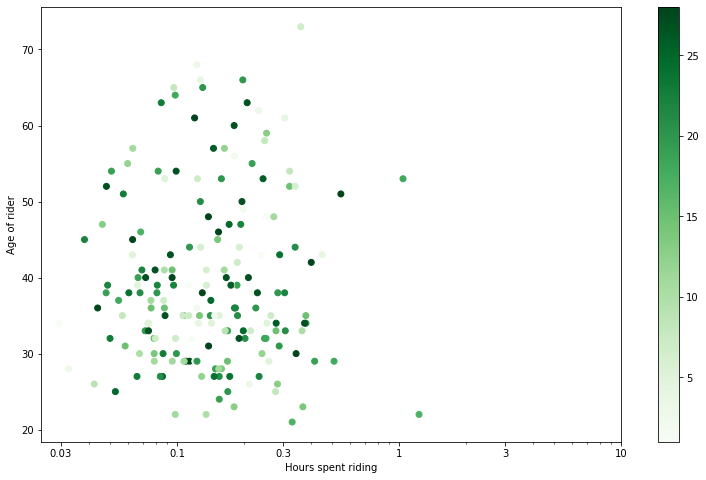

In [ ]:
# plotting a multivariate chart showing relationship between Age of riders, ride duration, and Day of the Month
plt.figure(figsize=(13,8))
plt.scatter(data = bike_sample, x = 'hours', y = 'Age_of_rider', c = 'day', cmap='Greens')
plt.xscale('log')
plt.xlabel('Hours spent riding')
plt.ylabel('Age of rider')
plt.xticks([0.03,0.1,0.3,1,3,10],['0.03','0.1','0.3','1','3','10'])
plt.colorbar();

>**Observations**
<br> From the plot above, we can see that majority of rides occur during the latter part of the month (20-28) with most rides falling below 30 minutes mark 

>**Question 24: How does Age of users relate to ride duration in terms of day of the weekday?**

>**Visualization**

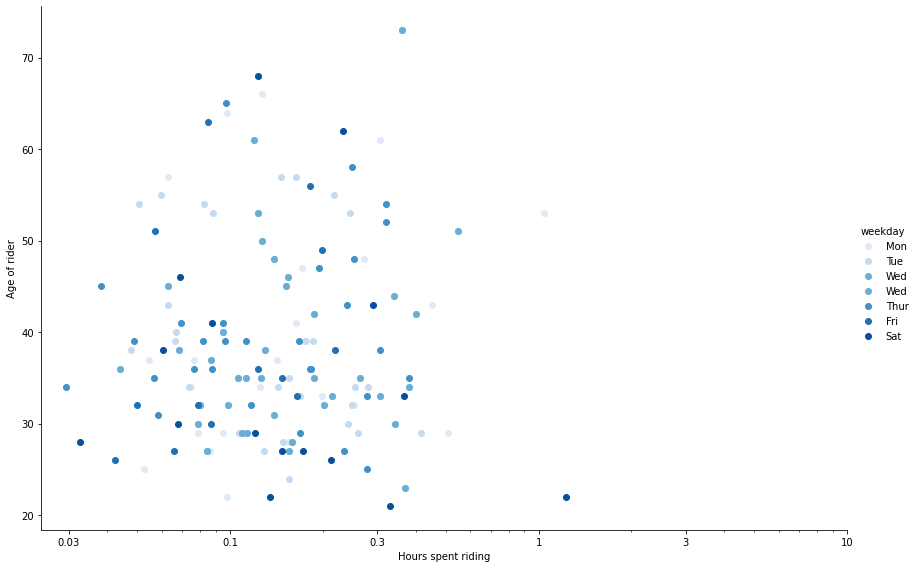

In [ ]:
# plotting a multivariate chart showing relationship between Age of riders, ride duration, and weekday>**Observations**>**Question 23: How does Age of users relate to ride duration in terms of day of the month?**
g = sns.FacetGrid(data = bike_sample, hue = 'weekday', hue_order=['Mon','Tue','Wed','Wed','Thur','Fri','Sat'], palette='Blues',height=8,aspect=1.5)
g.map(plt.scatter, 'hours', 'Age_of_rider')
plt.xscale('log')
plt.xlabel('Hours spent riding')
plt.ylabel('Age of rider')
plt.xticks([0.03,0.1,0.3,1,3,10],['0.03','0.1','0.3','1','3','10'])
g.add_legend();

>**Observations**
<br> From the plot above, we can see that most rides occur during the weekends and also falling below the 30 minutes mark and average age of riders being below 50 years

>**Question 25: How does weekday and user type affect ride duration?**

In [ ]:
# defining a function to plot multivariate plots of two categorical and one numeric variable
def multiqual(df,col):
    g = sns.FacetGrid(data = df, col = col, height= 4)
    g.map(sns.boxplot,'weekday','minutes',order=['Mon','Tue','Wed','Thur','Fri','Sat'], showfliers = False);

>**Visualization**

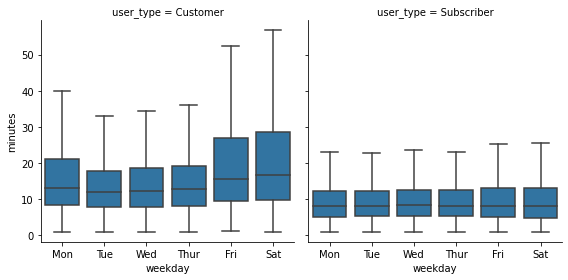

In [ ]:
multiqual(df,'user_type')

>**Observations**
<br> From the plot above, it is evident that subscribers less time on rides but ride duration are uniform across the weekdays

>**Question 26: How does weekday and Round_Trip affect ride duration?**

>**Visualization**

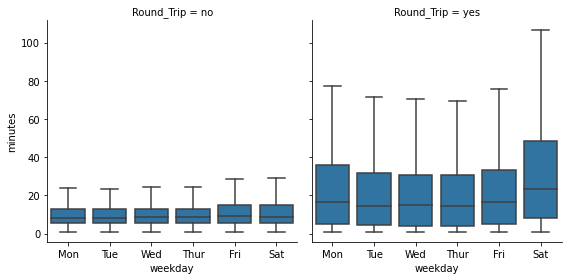

In [ ]:
multiqual(df,'Round_Trip')

>**Observations**
<br> From the plot above, we can see that round trips tipically take longer duration across the board but saturday has the highest ride duration record for roundtrips 

>**Question 27: How does weekday and user bike usage affect ride duration?**

>**Visualization**

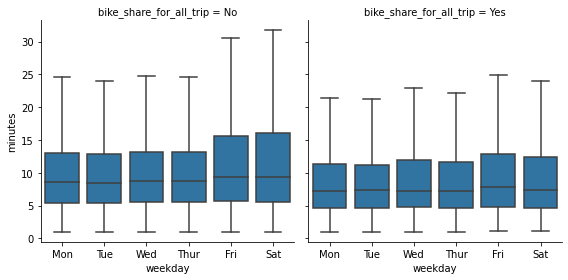

In [ ]:
multiqual(df,'bike_share_for_all_trip')

>**Observations**
<br> From the plot above, we can see that ride duration is mostly similar across bike usage with members who don't use the bike sharing app for all trips averagely spending some more minutes on ride duration

>**Question 28: How does weekday and member gender affect ride duration?**

>**Visualization**

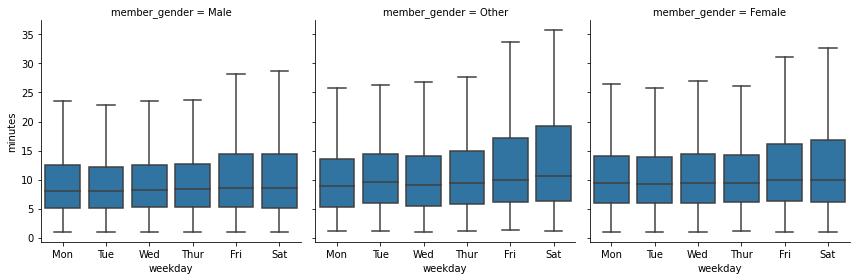

In [ ]:
multiqual(df,'member_gender')

>**Observations**
<br> From the plot above, we can see that the highest ride duration occurs for other member gender on saturday while the lowest ride duration occurs for male members on Tuesday

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Looking further into the analysis of features that affect ride duration, I noticed that there indeed is a positive relationship between Age and User type as it affects ride duration. We also see that most rides latter part of the month (20-28) with most rides and fall below 30 minutes mark. We see that ride duration is uniform for subscribers across the weekdays.

### Were there any interesting or surprising interactions between features?

> It was noticed that male members tend to travel for longer period of times covering more ride duration in min utes. Another suprising detail noticed in this analysis is that bike usage largely remains the same over the week for members who use the service everytime while for members who do not, frdays and saturdays see a jump in ride trip duration.

## Conclusions
>Summary of findings from my analysis:
After cleaning and wrangling the dataset, analysis began with univariate anlaysis, I noticed the minutes variable took on a large range of values with extreme outliers. After scaling the data using log transform, the data looked unimodal, with the peak between 6 minutes to 12 minutes, the Age variable was also slightly skewed to the right with a member being 144 years old though this is likely an error due to data collection. 
Further analysis using bivariate analysis showed ride duration as expected was affected by user_type, week_day, and time of day for the trip. We see the average ride duration of peak during the day roughly between 8am to 5pm. Also, weekends feature the longest ride duration in the dataset as compared to weekddays. Suprisingly though, casual users or customers have a longer ride duration compare to actual subscribers. This can be attributed to them using the service more regularly/daily for getting to their workplace. Another feature that had great correlation with ride duration is Age of patients with more younger users going for longer rides while the aged prefer shorter rides(<30 minutes).
Finally, multivariate analysis showed a positive relationship between Age and User type as it affects ride duration. I also noticed that most rides occur in the latter part of the month (20-28) and fall below 30 minutes mark. We see that ride duration is uniform for subscribers across the weekdays. I also notice that male members have more ride duration minutes. Another suprising detail noticed in this analysis is that bike usage largely remains the same over the week for members who use the service everytime while for members who do not, frdays and saturdays see a jump in ride trip duration.
